In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, norm

In [4]:
# Load the dataset
df = pd.read_csv('C:\\Users\\acris\\greends-avcad-2024\\examples\\EFIplus_medit.zip',compression='zip', sep=";")

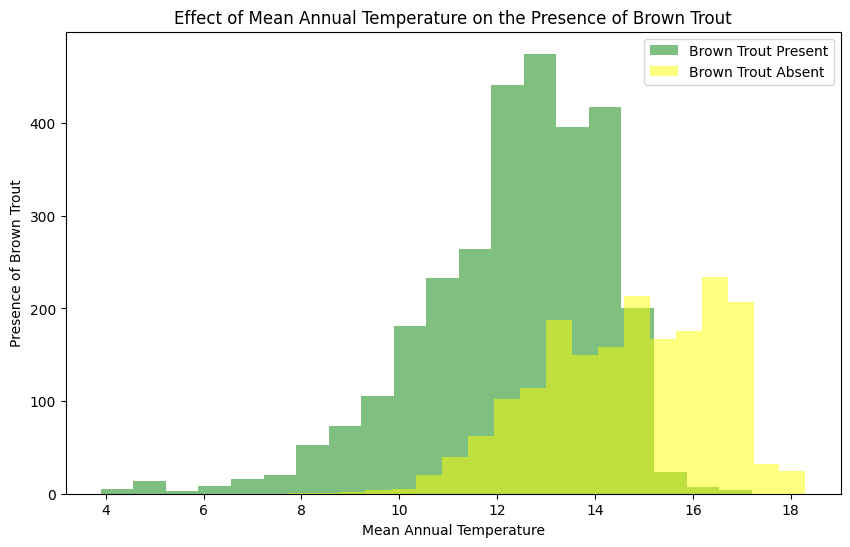

In [6]:
# Task 1: Visualization of Mean Annual Temperature (Temp_ann) vs. presence of Salmo trutta fario (Brown Trout)

# Astablish if the brown trout is present or absent
brown_trout_yes=df[df['Salmo trutta fario']>0]
brown_trout_no=df[df['Salmo trutta fario']==0]

# Draw boxplot
plt.figure(figsize=(10, 6))
plt.hist(brown_trout_yes['temp_ann'], bins=20, alpha=0.5, color='green', label='Brown Trout Present')
plt.hist(brown_trout_no['temp_ann'], bins=20, alpha=0.5, color='yellow', label='Brown Trout Absent')
plt.title('Effect of Mean Annual Temperature on the Presence of Brown Trout')
plt.xlabel('Mean Annual Temperature')
plt.ylabel('Presence of Brown Trout')
plt.legend()
plt.show()

Text(0, 0.5, 'Density')

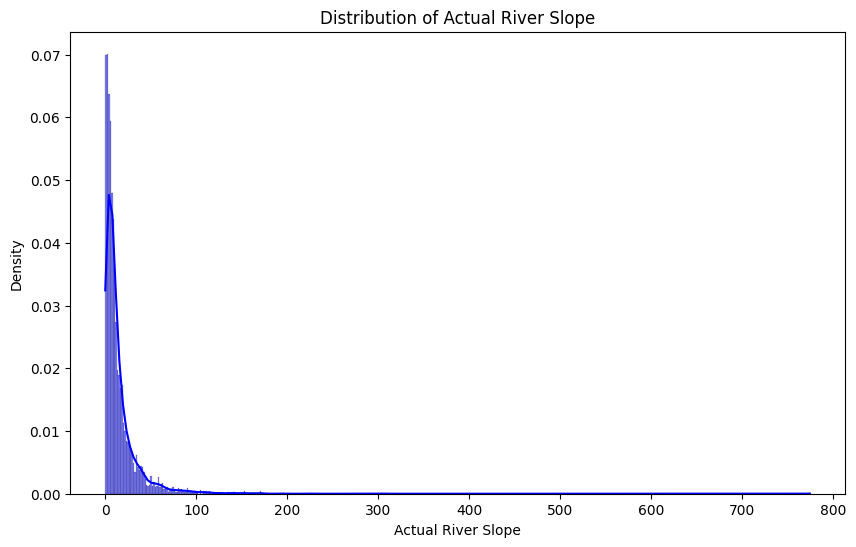

In [17]:
# Task 2: Visualization and hypothesis testing for actual_river_slope normality
actual_river_slope=df['Actual_river_slope']
actual_river_slope=actual_river_slope.dropna()
plt.figure(figsize=(10, 6))
sns.histplot(actual_river_slope, kde=True, stat='density', color='blue')
plt.title('Distribution of Actual River Slope')
plt.xlabel('Actual River Slope')
plt.ylabel('Density')

In [11]:
# Shapiro-Wilk test for normality
stat, p_value = shapiro(actual_river_slope)
print(f'Shapiro-Wilk test for normality:\nStatistic: {stat}\np-value: {p_value}')
if p_value > 0.05:
    print("The actual_river_slope is likely drawn from a normal distribution.")
else:
    print("The actual_river_slope is not drawn from a normal distribution.")

Shapiro-Wilk test for normality:
Statistic: 0.5163239471574013
p-value: 2.591069478544196e-79
The actual_river_slope is not drawn from a normal distribution.


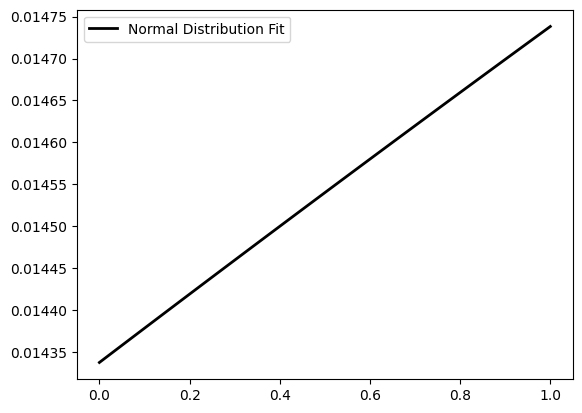

In [12]:
# Normal distribution visualization
mu, std = norm.fit(actual_river_slope)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.legend(['Normal Distribution Fit', 'Actual River Slope'])
plt.show()

Text(0, 0.5, 'Density')

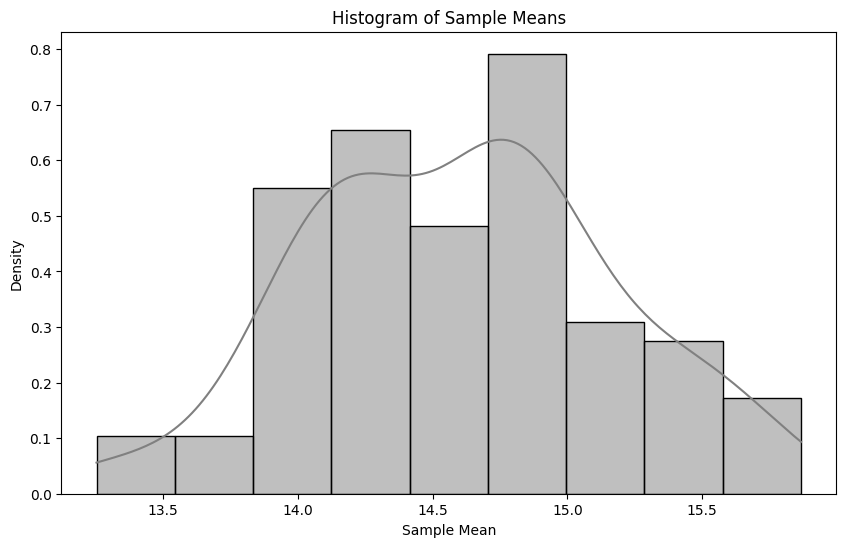

In [19]:
# Task 3: Sampling and testing normality of sample means
sample_means = []
for _ in range(100):
    sample = np.random.choice(actual_river_slope, size=2000, replace=True)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

# Plot histogram of sample means
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, kde=True, stat='density', color='grey')
plt.title('Histogram of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Density')

In [14]:
# Test for normality of sample means
stat, p_value = shapiro(sample_means)
print(f'\nShapiro-Wilk test for normality of sample means:\nStatistic: {stat}\np-value: {p_value}')
if p_value > 0.05:
    print("The sample means are likely drawn from a normal distribution.")
else:
    print("The sample means are not drawn from a normal distribution.")

plt.show()


Shapiro-Wilk test for normality of sample means:
Statistic: 0.9924420547907442
p-value: 0.8522526064548828
The sample means are likely drawn from a normal distribution.
